In [76]:
from IPython.display import Markdown

greetings = "Hello"
name = "Student NAME XYZ"

Markdown(f"""

## {greetings} {name}!

In this presentation, I will be going to discuss the relatin between GDP per capita and Population Growth based on the data obtained from Wikipeda`.

""")



## Hello Student NAME XYZ!

In this presentation, I will be going to discuss the relatin between GDP per capita and Population Growth based on the data obtained from Wikipeda`.



Exercise 1: Create a new dataframe pop with population data downloaded from Wikipedia. Make sure to clean the data so it can be used further.

In [7]:
import numpy as np
import pandas as pd

from IPython.display import IFrame
url = 'https://en.wikipedia.org/wiki/List_of_countries_by_population_(United_Nations)'
IFrame(url, width=800, height=400)
pop = pd.read_html(url, encoding='utf-8')[0]
mycols = pop.columns
mycols = [c[:c.find('[')] for c in mycols]
pop.columns = mycols
pop

,Country / Are,UN continentalregion,UN statisticalsubregion,Population(1 July 2018,Population(1 July 2019,Chang
0,China[a],Asia,Eastern Asia,1427647786,1433783686,+0.43%
1,India,Asia,Southern Asia,1352642280,1366417754,+1.02%
2,United States,Americas,Northern America,327096265,329064917,+0.60%
3,Indonesia,Asia,South-eastern Asia,267670543,270625568,+1.10%
4,Pakistan,Asia,Southern Asia,212228286,216565318,+2.04%
...,...,...,...,...,...,...
229,Falkland Islands (United Kingdom),Americas,South America,3234,3377,+4.42%
230,Niue,Oceania,Polynesia,1620,1615,−0.31%
231,Tokelau (New Zealand),Oceania,Polynesia,1319,1340,+1.59%
232,Vatican City[z],Europe,Southern Europe,801,799,−0.25%


Exercise 2: Merge the isocodes and pop dataframes.

In [9]:
from IPython.display import IFrame
url = 'https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes'
IFrame(url, width=800, height=400)
isocodes = pd.read_html(url, encoding='utf-8')[0]
isocodes = isocodes.droplevel(0, axis=1)
mycols = isocodes.columns
mycols = [c[:c.find('[')] for c in mycols]
isocodes.columns = mycols
isocodes['Alpha-2 code original'] = isocodes['Alpha-2 code']
isocodes['Alpha-2 code'] = isocodes['Subdivision code links'].apply(lambda x: x[x.find(':')+1:])
isocodes

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...
1,Åland Islands,Åland,Finland,AX,ALA,248,ISO 3166-2:AX,.ax,AX
2,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al,AL
3,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ
4,American Samoa,The Territory of American Samoa,United States,AS,ASM,016,ISO 3166-2:AS,.as,AS
...,...,...,...,...,...,...,...,...,...
266,Wallis and Futuna,The Territory of the Wallis and Futuna Islands,France,WF,WLF,876,ISO 3166-2:WF,.wf,WF
267,Western Sahara [ai],The Sahrawi Arab Democratic Republic,Disputed [aj],EH,ESH,732,ISO 3166-2:EH,[ak],EH
268,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,ISO 3166-2:YE,.ye,YE
269,Zambia,The Republic of Zambia,UN member state,ZM,ZMB,894,ISO 3166-2:ZM,.zm,ZM


In [11]:
merged = isocodes.merge(pop, left_on='Country name', right_on='Country / Are')
merged

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original,Country / Are,UN continentalregion,UN statisticalsubregion,Population(1 July 2018,Population(1 July 2019,Chang
0,Afghanistan,The Islamic Republic of Afghanistan,UN member state,AF,AFG,004,ISO 3166-2:AF,.af,.mw-parser-output .monospaced{font-family:mono...,Afghanistan,Asia,Southern Asia,37171921,38041754,+2.34%
1,Albania,The Republic of Albania,UN member state,AL,ALB,008,ISO 3166-2:AL,.al,AL,Albania,Europe,Southern Europe,2882740,2880917,−0.06%
2,Algeria,The People's Democratic Republic of Algeria,UN member state,DZ,DZA,012,ISO 3166-2:DZ,.dz,DZ,Algeria,Africa,Northern Africa,42228408,43053054,+1.95%
3,Andorra,The Principality of Andorra,UN member state,AD,AND,020,ISO 3166-2:AD,.ad,AD,Andorra,Europe,Southern Europe,77006,77142,+0.18%
4,Angola,The Republic of Angola,UN member state,AO,AGO,024,ISO 3166-2:AO,.ao,AO,Angola,Africa,Middle Africa,30809787,31825295,+3.30%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,Uzbekistan,The Republic of Uzbekistan,UN member state,UZ,UZB,860,ISO 3166-2:UZ,.uz,UZ,Uzbekistan,Asia,Central Asia,32476244,32981716,+1.56%
140,Vanuatu,The Republic of Vanuatu,UN member state,VU,VUT,548,ISO 3166-2:VU,.vu,VU,Vanuatu,Oceania,Melanesia,292680,299882,+2.46%
141,Yemen,The Republic of Yemen,UN member state,YE,YEM,887,ISO 3166-2:YE,.ye,YE,Yemen,Asia,Western Asia,28498683,29161922,+2.33%
142,Zambia,The Republic of Zambia,UN member state,ZM,ZMB,894,ISO 3166-2:ZM,.zm,ZM,Zambia,Africa,Eastern Africa,17351708,17861030,+2.94%


Exercise 3: Merge the dataframes we have created so far to have a unique dataframe that has ISO codes, GDP per capita, and population data.

In [23]:
# url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
# IFrame(url, width=800, height=400)
# gdppc_wiki = pd.read_html(url, encoding='utf-8')[1]
# gdppc_wiki.columns = ['Country/Territory', 'UN Region', 'gdppc_IMF', 'year_IMF',
#                       'gdppc_WB', 'year_WB', 'gdppc_CIA', 'year_CIA']


url = 'https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita'
IFrame(url, width=800, height=400)
gdppc_wiki = pd.read_html(url, encoding='utf-8')[1]
gdppc_wiki = gdppc_wiki.iloc[2:,:]
gdppc_wiki.columns = ["Rank", "Country/Territory", "Type"]
gdppc_wiki = gdppc_wiki[1:]
gdppc_wiki.reset_index()

gdppc_wiki['country_name'] = gdppc_wiki['Country/Territory'].str.replace('*', '', regex=True).str.strip()
for c in gdppc_wiki.columns[2:-1]:
    if gdppc_wiki[c].dtype=='O':
        gdppc_wiki[c] = pd.to_numeric(gdppc_wiki[c].str.replace('—', 'nan'), errors='coerce')
        if c.startswith('year'):
            gdppc_wiki[c] = gdppc_wiki[c].astype('Int64')

merged_old = isocodes.merge(gdppc_wiki, left_on='Country name', right_on='country_name')

In [26]:
merged_all = merged_old.merge(pop, left_on='Country name', right_on='Country / Are')
merged_all

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original,Rank,Country/Territory,Type,country_name,Country / Are,UN continentalregion,UN statisticalsubregion,Population(1 July 2018,Population(1 July 2019,Chang
0,Austria,The Republic of Austria,UN member state,AT,AUT,040,ISO 3166-2:AT,.at,AT,13,Austria,50078.0,Austria,Austria,Europe,Western Europe,8891388,8955102,+0.72%
1,Bahrain,The Kingdom of Bahrain,UN member state,BH,BHR,048,ISO 3166-2:BH,.bh,BH,15,Bahrain,NaN,Bahrain,Bahrain,Asia,Western Asia,1569446,1641172,+4.57%
2,Denmark,The Kingdom of Denmark,UN member state,DK,DNK,208,ISO 3166-2:DK,.dk,DK,14,Denmark,49496.0,Denmark,Denmark,Europe,Northern Europe,5752126,5771876,+0.34%
3,Iceland,Iceland,UN member state,IS,ISL,352,ISO 3166-2:IS,.is,IS,14,Iceland,52150.0,Iceland,Iceland,Europe,Northern Europe,336713,339031,+0.69%
4,Iceland,Iceland,UN member state,IS,ISL,352,ISO 3166-2:IS,.is,IS,11,Iceland,51399.0,Iceland,Iceland,Europe,Northern Europe,336713,339031,+0.69%
5,Ireland,Ireland,UN member state,IE,IRL,372,ISO 3166-2:IE,.ie,IE,5,Ireland,NaN,Ireland,Ireland,Europe,Northern Europe,4818690,4882495,+1.32%
6,Ireland,Ireland,UN member state,IE,IRL,372,ISO 3166-2:IE,.ie,IE,6,Ireland,NaN,Ireland,Ireland,Europe,Northern Europe,4818690,4882495,+1.32%
7,Kuwait,The State of Kuwait,UN member state,KW,KWT,414,ISO 3166-2:KW,.kw,KW,7,Kuwait,NaN,Kuwait,Kuwait,Asia,Western Asia,4137312,4207083,+1.69%
8,Luxembourg,The Grand Duchy of Luxembourg,UN member state,LU,LUX,442,ISO 3166-2:LU,.lu,LU,2,Luxembourg,NaN,Luxembourg,Luxembourg,Europe,Western Europe,604245,615729,+1.90%
9,Luxembourg,The Grand Duchy of Luxembourg,UN member state,LU,LUX,442,ISO 3166-2:LU,.lu,LU,2,Luxembourg,NaN,Luxembourg,Luxembourg,Europe,Western Europe,604245,615729,+1.90%


Exercise 4: Use the os package to create folders to export data and figures. Since you will be using the names of these folders a lot, save their names in variables called path, pathout, and pathgraphs, where path = './data/', pathout = './data/', and pathgraphs = './graphs/'

In [30]:
import os
path = './data/'
pathout = './data/'
pathgraphs = './graphs/'

os.mkdir(path)
os.mkdir(pathgraphs)

Exercise 5: Save the dataframe created in Exercise 3 as a CSV, XLSX, and Stata file into the pathout folder. Use a variable called filename = 'Wiki_Data' so you can use similar code to save all file types. Notice only the filetype will change.

In [31]:
filename = 'Wiki_Data'
merged_all.to_csv(pathout+filename+".csv", index=False)
merged_all.to_excel(pathout+filename+".xlsx")
merged_all.to_stata(pathout+filename+".dta") 

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\io\stata.py:2491: InvalidColumnName: 
Not all pandas column names were valid Stata variable names.
The following replacements have been made:

    Country name   ->   Country_name
    Official state name   ->   Official_state_name
    Alpha-2 code   ->   Alpha_2_code
    Alpha-3 code   ->   Alpha_3_code
    Numeric code   ->   Numeric_code
    Subdivision code links   ->   Subdivision_code_links
    Internet ccTLD   ->   Internet_ccTLD
    Alpha-2 code original   ->   Alpha_2_code_original
    Country/Territory   ->   Country_Territory
    Country / Are   ->   Country___Are
    UN continentalregion   ->   UN_continentalregion
    UN statisticalsubregion   ->   UN_statisticalsubregion
    Population(1 July 2018   ->   Population_1_July_2018
    Population(1 July 2019   ->   Population_1_July_2019

If this is not what you expect, please make sure you have Stata-compliant
column names in your DataFrame (strin

Exercise 6: Create plots showing the relation between GDP per capita and Population. Create all 4 types of possible regression plots and save them as PNG, PDF, and JPG files. Make sure to save them in the folder you created for graphs

In [32]:
merged_all

,Country name,Official state name,Sovereignty,Alpha-2 code,Alpha-3 code,Numeric code,Subdivision code links,Internet ccTLD,Alpha-2 code original,Rank,Country/Territory,Type,country_name,Country / Are,UN continentalregion,UN statisticalsubregion,Population(1 July 2018,Population(1 July 2019,Chang
0,Austria,The Republic of Austria,UN member state,AT,AUT,040,ISO 3166-2:AT,.at,AT,13,Austria,50078.0,Austria,Austria,Europe,Western Europe,8891388,8955102,+0.72%
1,Bahrain,The Kingdom of Bahrain,UN member state,BH,BHR,048,ISO 3166-2:BH,.bh,BH,15,Bahrain,NaN,Bahrain,Bahrain,Asia,Western Asia,1569446,1641172,+4.57%
2,Denmark,The Kingdom of Denmark,UN member state,DK,DNK,208,ISO 3166-2:DK,.dk,DK,14,Denmark,49496.0,Denmark,Denmark,Europe,Northern Europe,5752126,5771876,+0.34%
3,Iceland,Iceland,UN member state,IS,ISL,352,ISO 3166-2:IS,.is,IS,14,Iceland,52150.0,Iceland,Iceland,Europe,Northern Europe,336713,339031,+0.69%
4,Iceland,Iceland,UN member state,IS,ISL,352,ISO 3166-2:IS,.is,IS,11,Iceland,51399.0,Iceland,Iceland,Europe,Northern Europe,336713,339031,+0.69%
5,Ireland,Ireland,UN member state,IE,IRL,372,ISO 3166-2:IE,.ie,IE,5,Ireland,NaN,Ireland,Ireland,Europe,Northern Europe,4818690,4882495,+1.32%
6,Ireland,Ireland,UN member state,IE,IRL,372,ISO 3166-2:IE,.ie,IE,6,Ireland,NaN,Ireland,Ireland,Europe,Northern Europe,4818690,4882495,+1.32%
7,Kuwait,The State of Kuwait,UN member state,KW,KWT,414,ISO 3166-2:KW,.kw,KW,7,Kuwait,NaN,Kuwait,Kuwait,Asia,Western Asia,4137312,4207083,+1.69%
8,Luxembourg,The Grand Duchy of Luxembourg,UN member state,LU,LUX,442,ISO 3166-2:LU,.lu,LU,2,Luxembourg,NaN,Luxembourg,Luxembourg,Europe,Western Europe,604245,615729,+1.90%
9,Luxembourg,The Grand Duchy of Luxembourg,UN member state,LU,LUX,442,ISO 3166-2:LU,.lu,LU,2,Luxembourg,NaN,Luxembourg,Luxembourg,Europe,Western Europe,604245,615729,+1.90%


In [33]:
merged_all.columns

Index(['Country name', 'Official state name', 'Sovereignty', 'Alpha-2 code',
       'Alpha-3 code', 'Numeric code', 'Subdivision code links',
       'Internet ccTLD', 'Alpha-2 code original', 'Rank', 'Country/Territory',
       'Type', 'country_name', 'Country / Are', 'UN continentalregion',
       'UN statisticalsubregion', 'Population(1 July 2018',
       'Population(1 July 2019', 'Chang'],
      dtype='object')

In [47]:
merged_all['Rank'] = merged_all['Rank'].astype(int)
merged_all['Numeric code'] = merged_all['Numeric code'].astype(int)

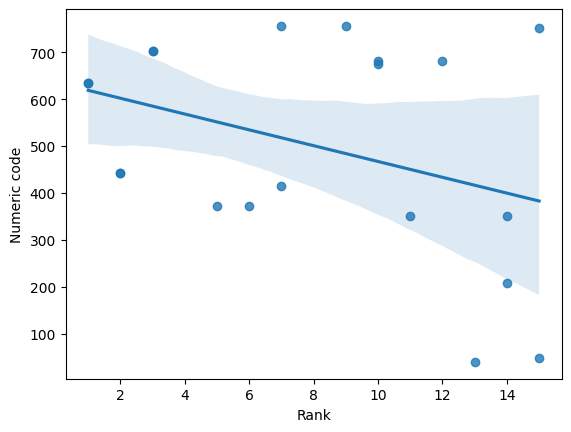

In [68]:
import seaborn as sns
sns.regplot(x="Rank", y="Numeric code", data=merged_all)
plt.savefig(pathgraphs+'E6_R1.png')
plt.savefig(pathgraphs+'E6_R1.JPG')
plt.savefig(pathgraphs+'E6_R1.pdf')

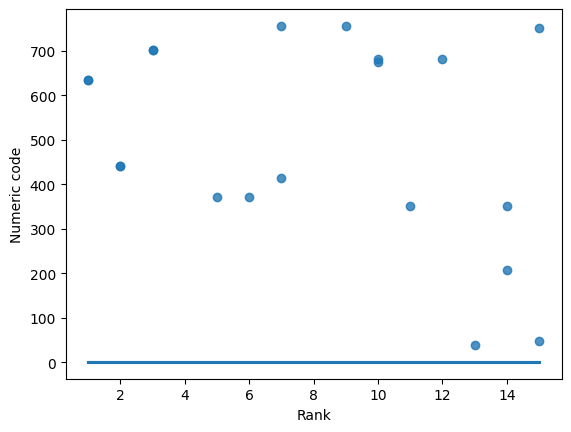

In [69]:
sns.regplot(x="Rank", y="Numeric code", data=merged_all, logistic=True)
plt.savefig(pathgraphs+'E6_R2.png')
plt.savefig(pathgraphs+'E6_R2.JPG')
plt.savefig(pathgraphs+'E6_R2.pdf')

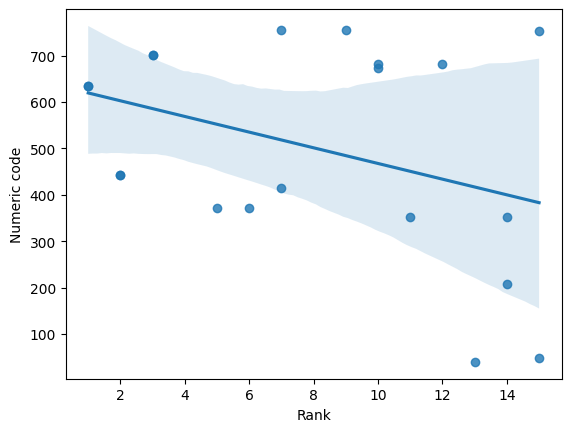

In [70]:
sns.regplot(x="Rank", y="Numeric code", data=merged_all, robust=True)
plt.savefig(pathgraphs+'E6_R3.png')
plt.savefig(pathgraphs+'E6_R3.JPG')
plt.savefig(pathgraphs+'E6_R3.pdf')

In [71]:
import matplotlib.pyplot as plt
mymodel = np.poly1d(np.polyfit(merged_all["Rank"], merged_all["Numeric code"], 3))
myline = np.linspace(1, 22, 100)
plt.scatter(merged_all["Rank"], merged_all["Numeric code"])
plt.plot(myline, mymodel(myline))
plt.savefig(pathgraphs+'E6_R4.png')
plt.savefig(pathgraphs+'E6_R4.JPG')
plt.savefig(pathgraphs+'E6_R4.pdf')
plt.close()

Exercise 7: Create plots showing the relation between GDP per capita and Population Growth. Create all 4 types of possible regression plots and save them as PNG, PDF, and JPG files. Make sure to save them in the folder you created for graphs

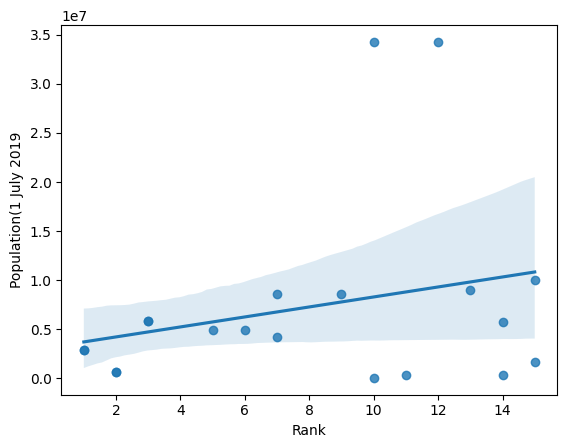

In [72]:
import seaborn as sns
sns.regplot(x="Rank", y="Population(1 July 2019", data=merged_all)
plt.savefig(pathgraphs+'E7_R1.png')
plt.savefig(pathgraphs+'E7_R1.JPG')
plt.savefig(pathgraphs+'E7_R1.pdf')

C:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\genmod\families\links.py:187: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


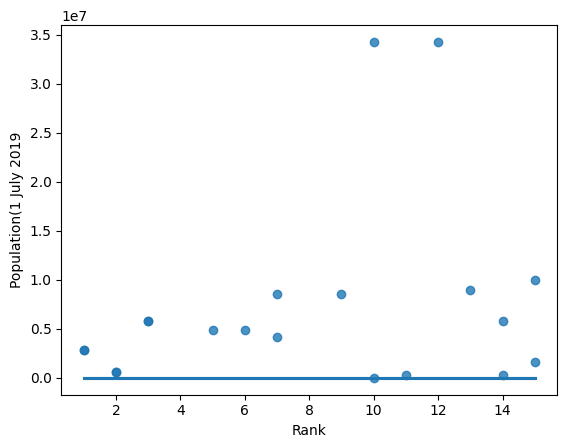

In [73]:
sns.regplot(x="Rank", y="Population(1 July 2019", data=merged_all, logistic=True)
plt.savefig(pathgraphs+'E7_R2.png')
plt.savefig(pathgraphs+'E7_R2.JPG')
plt.savefig(pathgraphs+'E7_R2.pdf')

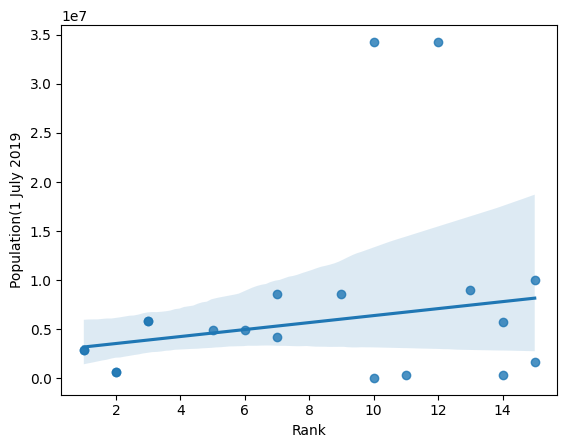

In [74]:
sns.regplot(x="Rank", y="Population(1 July 2019", data=merged_all, robust=True)
plt.savefig(pathgraphs+'E7_R3.png')
plt.savefig(pathgraphs+'E7_R3.JPG')
plt.savefig(pathgraphs+'E7_R3.pdf')

In [75]:
import matplotlib.pyplot as plt
mymodel = np.poly1d(np.polyfit(merged_all["Rank"], merged_all["Population(1 July 2019"], 3))
myline = np.linspace(1, 22, 100)
plt.scatter(merged_all["Rank"], merged_all["Population(1 July 2019"])
plt.plot(myline, mymodel(myline))
plt.savefig(pathgraphs+'E7_R4.png')
plt.savefig(pathgraphs+'E7_R4.JPG')
plt.savefig(pathgraphs+'E7_R4.pdf')
plt.close()

Exercise 8: Using the notebook create slides for presenting your work and results. Once you have your slides, create a new public repo, publish it, and make sure to create a READ.ME file that show links to the notebook, html, and slides. Also, create the gh-pages branch to have a working slides webpage.